**Step 2: Implementing an RNN (LSTM) for Time-Series Prediction**

the second example involves non-image (kwani AI ni image tu?) build a Recurrent Neural Network

(LSTM) to predict the next value in a sequence.

For this, we'll generate a synthetic dataset of a sine wave.

Technique: when you do not have, generate!

In [1]:
#Import Libraries and Load Data
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate a sine wave dataset
def generate_sine_wave_data(seq_length=50, num_samples=1000):
    x_values = np.linspace(0, 100, num_samples)
    y_values = np.sin(x_values)
    
    X, y = [], []
    for i in range(len(y_values) - seq_length):
        X.append(y_values[i:i+seq_length])
        y.append(y_values[i+seq_length])
    
    return np.array(X), np.array(y)

In [3]:
# Prepare dataset
X, y = generate_sine_wave_data()
X = X.reshape((X.shape[0], X.shape[1], 1)) # Reshape for RNN (samples, timesteps, features)

In [4]:
# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [5]:
#Build an LSTM Model
model = keras.Sequential([
 keras.layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
 keras.layers.Dense(1) # Output single value prediction
])

C:\Users\Alvin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#Compile and Train the LSTM Model
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.4121 - val_loss: 0.1717
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1193 - val_loss: 0.0482
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0247 - val_loss: 0.0055
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0027 - val_loss: 3.2779e-04
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.2522e-04 - val_loss: 2.1480e-04
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.9235e-04 - val_loss: 1.6649e-04
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.5826e-04 - val_loss: 1.3837e-04
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.3443e-04 - val_loss: 1.0278e-04
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.0602e-04 - val_loss: 8.5930e-05
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.9859e-05 - val_loss: 7.9707e-05


In [7]:
#Evaluate and Predict
test_predictions = model.predict(X_test)
import matplotlib.pyplot as plt

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step 


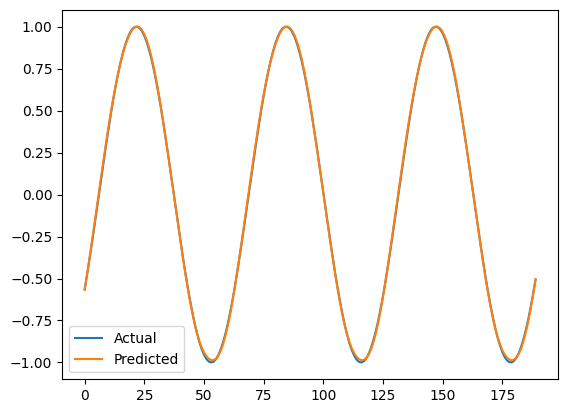

In [8]:
# Plot actual vs predicted values
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.legend()
plt.show()

This LSTM model captures temporal dependencies in sequential data.

Idea: a) It can be extended for medical applications like predicting patient vitals over time or

analyzing disease progression. b) Modify the CNN to classify more complex images (e.g.,
                                                                                  
microscopic urine images). c) Expand the RNN to handle medical time-series data (e.g., ECG, blood
                                                                                 
pressure readings). d) Explore combining CNNs + RNNs for tasks like video analysis or multimodal

medical AI.